In [41]:
#importing all the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [42]:
#importing dataset
df = pd.read_csv('https://raw.githubusercontent.com/supragyabajpai/SchulichJourney_DataScience/main/Assignment_2(experiment_dataset)/experiment_dataset.csv')

In [43]:
# taking an overview of the data
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   int64  
 1   Age         1000 non-null   int64  
 2   Location    1000 non-null   object 
 3   Device      1000 non-null   object 
 4   Variant     1000 non-null   object 
 5   Time Spent  1000 non-null   float64
 6   CTR         1000 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 54.8+ KB


In [44]:
# taking an overview of the data
df.head(10) 

,Unnamed: 0,Age,Location,Device,Variant,Time Spent,CTR
0,0,62,Location2,Device2,Control,13.928669,0.084776
1,1,18,Location1,Device1,Variant B,11.310518,0.096859
2,2,21,Location2,Device1,Variant B,24.842100,0.097630
3,3,21,Location1,Device3,Variant B,20.061300,0.109783
4,4,57,Location1,Device2,Variant B,34.495503,0.068579
5,5,27,Location3,Device1,Variant B,26.129246,0.149341
6,6,37,Location3,Device3,Variant B,20.525362,0.095788
7,7,39,Location2,Device1,Variant A,21.525217,0.149985
8,8,54,Location3,Device2,Control,21.910608,0.135535
9,9,41,Location1,Device2,Variant A,27.642788,0.137266


In [45]:
# I will remove the unnamed column 
df.drop('Unnamed: 0', axis=1, inplace = True)

In [46]:
df.head(3) 

,Age,Location,Device,Variant,Time Spent,CTR
0,62,Location2,Device2,Control,13.928669,0.084776
1,18,Location1,Device1,Variant B,11.310518,0.096859
2,21,Location2,Device1,Variant B,24.842100,0.097630


I would like to examine the distribution of each column separately in order to detect any outliers.

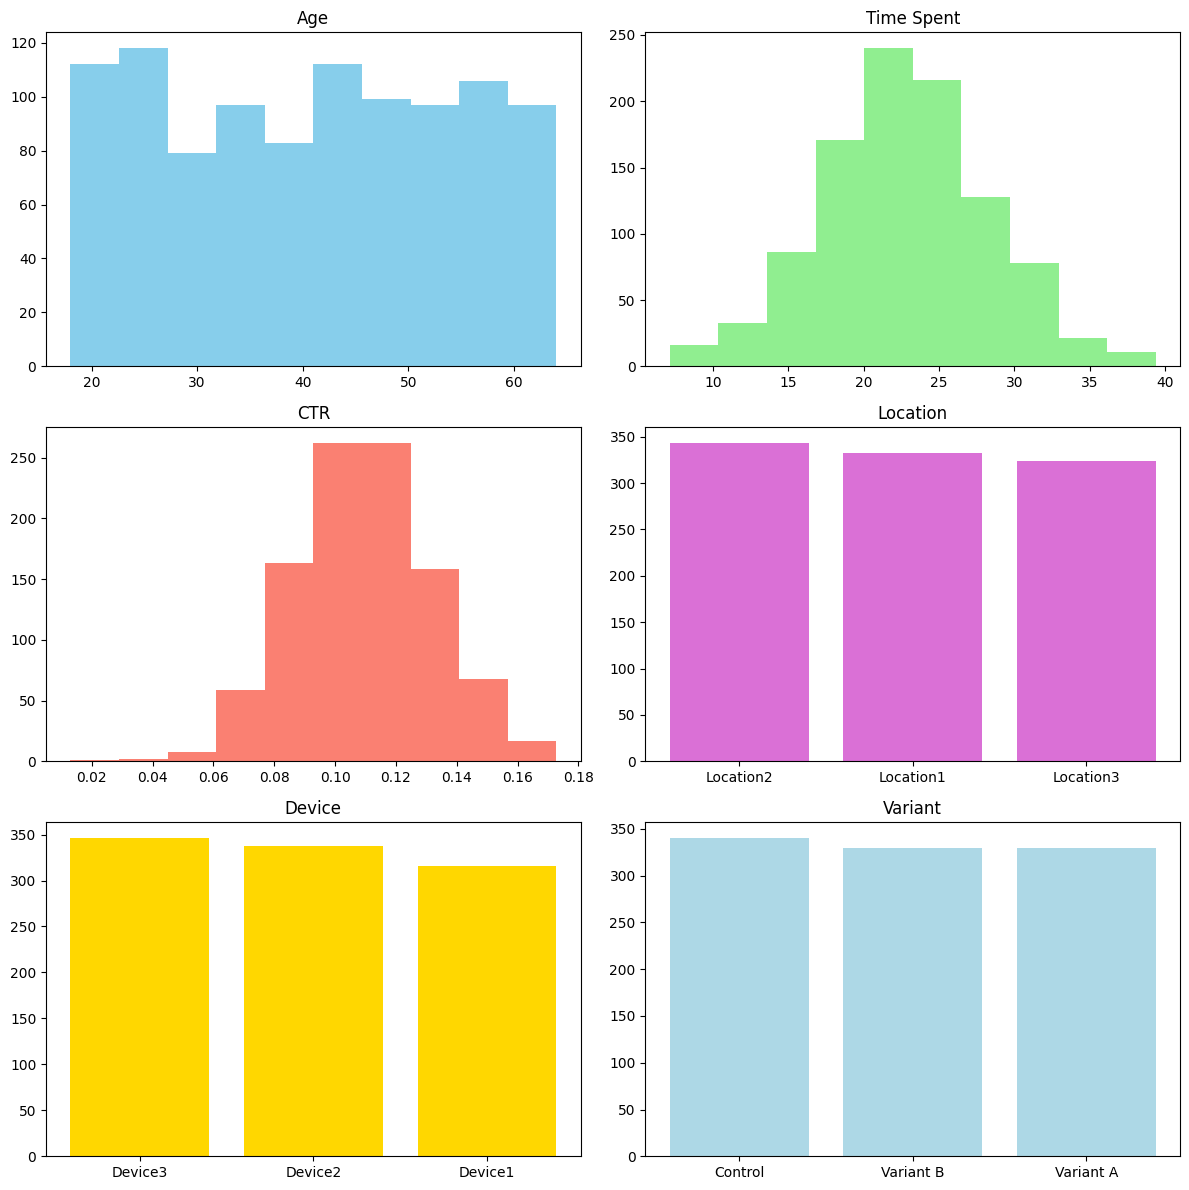

In [33]:
# Extract the columns from the data
age = df['Age']
location = df['Location']
device = df['Device']
variant = df['Variant']
time_spent = df['Time Spent']
ctr = df['CTR']

# Create subplots for each column
fig, axs = plt.subplots(3, 2, figsize=(12, 12))

# Plot histograms for numerical columns (Age, Time Spent, CTR)
axs[0, 0].hist(age, bins=10, color='skyblue')
axs[0, 0].set_title('Age')

axs[0, 1].hist(time_spent, bins=10, color='lightgreen')
axs[0, 1].set_title('Time Spent')

axs[1, 0].hist(ctr, bins=10, color='salmon')
axs[1, 0].set_title('CTR')

# Plot bar plots for categorical columns (Location, Device, Variant)
axs[1, 1].bar(location.value_counts().index, location.value_counts().values, color='orchid')
axs[1, 1].set_title('Location')

axs[2, 0].bar(device.value_counts().index, device.value_counts().values, color='gold')
axs[2, 0].set_title('Device')

axs[2, 1].bar(variant.value_counts().index, variant.value_counts().values, color='lightblue')
axs[2, 1].set_title('Variant')

# Adjust the layout and spacing
plt.tight_layout()

# Display the plots
plt.show()


The provided graphs indicate that the data is evenly distributed across the dataset.

I will now conduct a statistical analysis to ensure that the variables exhibit similar behavior.

In [47]:
# By location
df.groupby('Location')[['CTR', 'Time Spent']].mean()

,CTR,Time Spent
Location,,
Location1,0.110217,22.707286
Location2,0.108517,22.648998
Location3,0.108708,22.787691


In [49]:
# This looks mostly the same. 
#Let's use an ANOVA test to validate each metric. If they are statistically the same, they should have a HIGH p-value
loc_1 = df[df['Location'] == 'Location1']['CTR']
loc_2 = df[df['Location'] == 'Location2']['CTR']
loc_3 = df[df['Location'] == 'Location3']['CTR']

p_val = stats.f_oneway(loc_1, loc_2, loc_3)
print(p_val)

F_onewayResult(statistic=0.5792245145655729, pvalue=0.5605211716238133)


In [50]:
#same for Time spent 
loc_1 = df[df['Location'] == 'Location1']['Time Spent']
loc_2 = df[df['Location'] == 'Location2']['Time Spent']
loc_3 = df[df['Location'] == 'Location3']['Time Spent']

p_val = stats.f_oneway(loc_1, loc_2, loc_3)
print(p_val)

F_onewayResult(statistic=0.053578839670573676, pvalue=0.9478339402848069)


For all 3 locations, it seems that the users behave the same. There is no statistically significant difference between them.

Let's check the same for device type.



In [53]:
loc_1 = df[df['Device'] == 'Device1']['CTR']
loc_2 = df[df['Device'] == 'Device2']['CTR']
loc_3 = df[df['Device'] == 'Device3']['CTR']

p_val = stats.f_oneway(loc_1, loc_2, loc_3)
print(p_val)

F_onewayResult(statistic=0.7105872492654717, pvalue=0.4916042399968955)


In [55]:
loc_1 = df[df['Device'] == 'Device1']['Time Spent']
loc_2 = df[df['Device'] == 'Device2']['Time Spent']
loc_3 = df[df['Device'] == 'Device3']['Time Spent']

p_val = stats.f_oneway(loc_1, loc_2, loc_3)
print(p_val)

F_onewayResult(statistic=0.26645371811833884, pvalue=0.7661459958744103)


Similar to the Location analysis, it appears that even with different devices, the user behavior remains consistent. There is no statistically significant difference observed between the devices.

In [8]:
grouped_df = df.groupby('Variant')[['CTR', 'Time Spent']].mean()
print(grouped_df)

                CTR  Time Spent
Variant                        
Control    0.098554   20.070781
Variant A  0.120269   24.805547
Variant B  0.108933   23.343783


--------------------------------------------------------------------------------------------------------------------------------

### Question 1 : Analyze the results to determine which feature (if any) results in CTR or Time Spent lift?



In [35]:
df_CTR_lift = df.groupby(by = 'Variant')['CTR'].mean() 
lift_Variant_A = df_CTR_lift['Variant A'] - df_CTR_lift['Control']
lift_Variant_B = df_CTR_lift['Variant B'] - df_CTR_lift['Control']
print('Variant A Lift in CTR:', lift_Variant_A)
print('Variant B Lift in CTR:', lift_Variant_B)

Variant A Lift in CTR: 0.021715340138027575
Variant B Lift in CTR: 0.010378887088416625


Variant A and Variant B exhibit a lift in CTR compared to the Control group. This suggests that implementing either Variant A or Variant B would likely lead to an increase in CTR, with Variant A showing a larger lift than Variant B.

In [36]:
df_TimeSpent_lift = df.groupby(by = 'Variant')['Time Spent'].mean() 
TS_lift_Variant_A = df_TimeSpent_lift['Variant A'] - df_TimeSpent_lift['Control']
TS_lift_Variant_B = df_TimeSpent_lift['Variant B'] - df_TimeSpent_lift['Control']
print('Variant A Lift in Time Spent:', TS_lift_Variant_A)
print('Variant B Lift in Time Spent:', TS_lift_Variant_B)

Variant A Lift in Time Spent: 4.734766375399197
Variant B Lift in Time Spent: 3.2730019680577236


Variant A and Variant B exhibit a lift in Time Spent compared to the Control group. This suggests that implementing either Variant A or Variant B would likely result in an increase in average Time Spent. Variant A shows a larger lift in Time Spent compared to Variant B.

--------------------------------------------------------------------------------------------------------------------------------

### Q2 : Conduct statistical testing to determine if there is a statistically significant difference between the features and the control group.

-We have the option to utilize an ANOVA test to compare all three groups (Variant A, Variant B, and Control) and employ t-tests to compare individual variants against the Control group, as well as to compare the two variants with each other.

In [19]:
# checking CTR
var1 = df[df['Variant']=='Variant A']['CTR']
var2 = df[df['Variant']=='Variant B']['CTR']
control = df[df['Variant']=='Control']['CTR']

p_val = stats.f_oneway(var1, var2, control)
print(p_val)

F_onewayResult(statistic=93.58891593622702, pvalue=5.638952705781554e-38)


In [20]:
# checking Time Spent
var1 = df[df['Variant']=='Variant A']['Time Spent']
var2 = df[df['Variant']=='Variant B']['Time Spent']
control = df[df['Variant']=='Control']['Time Spent']

p_val = stats.f_oneway(var1, var2, control)
print(p_val)

F_onewayResult(statistic=75.60840947416146, pvalue=2.676826588910432e-31)


Based on the ANOVA, we see that both the CTR and time Spent have statistically significant results! This means that the variants and the control group have completely different behaviours in their CTR and Time Spent, based on the Varient used.

Now we will do individuall t test

In [25]:
var1 = df[df['Variant']=='Variant A']['CTR']
var2 = df[df['Variant']=='Variant B']['CTR']
control = df[df['Variant']=='Control']['CTR']

tstat_ctr_a, pvalue_ctr_a  = stats.ttest_ind(var1, control)
tstat_ctr_b, pvalue_ctr_b  = stats.ttest_ind(var2, control)
tstat_ctr_ab, pvalue_ctr_ab  = stats.ttest_ind(var1, var2)

print('CTR - Variant A vs Control:')
print('t-statistic:', tstat_ctr_a)
print('p-value:', pvalue_ctr_a)

print('\n')

print('CTR - Variant B vs Control:')
print('t-statistic:', tstat_ctr_b)
print('p-value:', pvalue_ctr_b)

print('\n')

print('CTR - Variant A vs Variant B:')
print('t-statistic:', tstat_ctr_ab)
print('p-value:', pvalue_ctr_ab)

CTR - Variant A vs Control:
t-statistic: 13.829424737499187
p-value: 1.9602781373243157e-38


CTR - Variant B vs Control:
t-statistic: 6.4718143491783255
p-value: 1.8743198199982106e-10


CTR - Variant A vs Variant B:
t-statistic: 7.08499696316128
p-value: 3.587180487986577e-12


The statistical analysis indicates that both Variant A and Variant B show a significant increase in CTR compared to the Control group. Moreover, it seems that Variant A has a higher CTR than Variant B. These findings hold importance in evaluating the effectiveness of various variants and can provide valuable insights for decision-making related to the CTR metric.

In [27]:
var1 = df[df['Variant']=='Variant A']['Time Spent']
var2 = df[df['Variant']=='Variant B']['Time Spent']
control = df[df['Variant']=='Control']['Time Spent']

tstat_TS_a, pvalue_TS_a  = stats.ttest_ind(var1, control)
tstat_TS_b, pvalue_TS_b  = stats.ttest_ind(var2, control)
tstat_TS_ab, pvalue_TS_ab  = stats.ttest_ind(var1, var2)

print('Time Spent - Variant A vs Control:')
print('t-statistic:', tstat_TS_a)
print('p-value:', pvalue_TS_a)

print('\n')

print('Time Spent - Variant B vs Control:')
print('t-statistic:', tstat_TS_b)
print('p-value:', pvalue_TS_b)

print('\n')

print('Time Spent - Variant A vs Variant B:')
print('t-statistic:', tstat_TS_ab)
print('p-value:', pvalue_TS_ab)

Time Spent - Variant A vs Control:
t-statistic: 12.142363487472364
p-value: 8.488565644996449e-31


Time Spent - Variant B vs Control:
t-statistic: 8.174237395991806
p-value: 1.496358076285182e-15


Time Spent - Variant A vs Variant B:
t-statistic: 3.6788175394209075
p-value: 0.0002534771014765265


Variant A and Variant B exhibit significantly higher time spent compared to the Control group. Additionally, Variant A has a higher time spent than Variant B. These findings can be valuable in assessing the impact of different variants on the time spent metric and informing decision-making in the context of maximizing user engagement.

--------------------------------------------------------------------------------------------------------------------------------

### Q3. Summarize your results. Make a recommendation to the engineering team about which feature to deploy. 

-- After examining the results and analysis, here is a summary and recommendation for the engineering team:

Click-Through Rate (CTR): Both Variant A and Variant B demonstrate a notable increase in CTR compared to the Control group. Variant A shows a greater CTR boost than Variant B, indicating that implementing either of them would likely result in an increased CTR. However, Variant A has a more significant impact on CTR. Thus, if the main goal is to maximize CTR, it is advisable to implement Variant A.

Time Spent: Both Variant A and Variant B show a substantial increase in average Time Spent compared to the Control group. Variant A exhibits a larger increase in Time Spent than Variant B, suggesting that implementing either Variant A or Variant B would likely lead to enhanced user engagement and increased Time Spent. If the objective is to maximize user engagement and Time Spent, Variant A is recommended due to its higher increase.

In conclusion, Both result are statistically significant against the null-hypothesis, with p-values far below 0.05. This means that the Variants are very likely to perform better than the control when more samples are taken.Based on the analysis of CTR and Time Spent, it is recommended to implement Variant A. It shows a higher increase in both CTR and Time Spent compared to Variant B and the Control group. Implementing Variant A is likely to yield better outcomes in terms of CTR and user engagement. However, it is very important to consider additional factors such as implementation feasibility, cost, and other relevant considerations before making a final decision.

--------------------------------------------------------------------------------------------------------------------------------

### Q4. Create a roll-out plan. How quickly will you introduce the feature to your audience?

--Developing a roll-out plan for introducing the feature to your audience requires careful consideration of various factors, such as user impact, technical feasibility, and risk management. Here is a suggested approach for the roll-out plan:

1. Transition Variant B users to Variant A: To ensure a seamless transition, it is advisable to promptly move users from Variant B to Variant A. This prevents users from developing strong attachments to Variant B and reduces the likelihood of resistance or dissatisfaction. Additionally, with the control group still in place we can continue monitoring the performance of Variant A with a larger user base.

2. Gradual Expansion: Expand the release gradually to a wider user base while closely monitoring the feature's performance and stability. This step helps identify any potential issues that may arise with increased usage.

3. Communicate the transition to users: Provide clear and transparent communication to users throughout the transition process. Explain the reasons for the change, highlight the benefits of Variant A, and address any concerns or questions they may have. This approach builds trust and helps mitigate potential resistance.

In addition to the mentioned steps, it is important to take into account several factors such as careful planning and preparation, conducting pilot testing, and ensuring continuous monitoring and support.

*The speed at which you introduce the feature to your audience will depend on factors such as the complexity of the feature, its potential impact, and the available resources for monitoring and support. It is generally recommended to proceed cautiously, ensuring thorough testing and validation at each stage of the roll-out. This enables you to mitigate risks and make informed decisions based on data as you gradually introduce the feature to a wider audience.*

From a business perspective, I recommend introducing Variant A promptly, considering that the testing has demonstrated its superior performance in both Time Spent and CTR. However, it is essential to proceed cautiously by conducting thorough testing and validation at each stage of the roll-out. This approach will help mitigate potential risks and ensure the success of the introduction of Variant A.

--------------------------------------------------------------------------------------------------------------------------------
